# Comparison of random number generators

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

N_SAMPLES = 10000
BINS = 100

### 1. Linear Congruential (Standard C library)

In [2]:
linear_congruential = pd.read_csv("data/gaussian/linear_congruential.csv", nrows=N_SAMPLES)
linear_congruential.describe()

,Linear Congruential Numbers
count,10000.000000
mean,-0.010950
std,1.000415
min,-3.554993
25%,-0.688756
50%,-0.007263
75%,0.664660
max,3.834611


### 2. Mersenne-Twister (Python's random)

In [3]:
mersenne_twister = pd.read_csv("data/gaussian/mersenne_twister.csv", nrows=N_SAMPLES)
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,10000.000000
mean,-0.008341
std,1.009584
min,-3.748281
25%,-0.697541
50%,-0.003436
75%,0.680284
max,4.121839


### 3. True random numbers (random.org)

In [4]:
true_random = pd.read_csv("data/gaussian/true_random.csv", nrows=N_SAMPLES)
true_random.describe()

,True Random Numbers
count,10000.000000
mean,0.008309
std,0.993134
min,-3.589137
25%,-0.659361
50%,0.011601
75%,0.679331
max,3.904554


In [5]:
true_random_set = set()

for num in true_random["True Random Numbers"]:
    if num in true_random_set:
        print("Duplicate found in true random numbers:", num)
        break

    true_random_set.add(num)

print("Unique true random numbers:", len(true_random_set))

Unique true random numbers: 10000


## Histograms

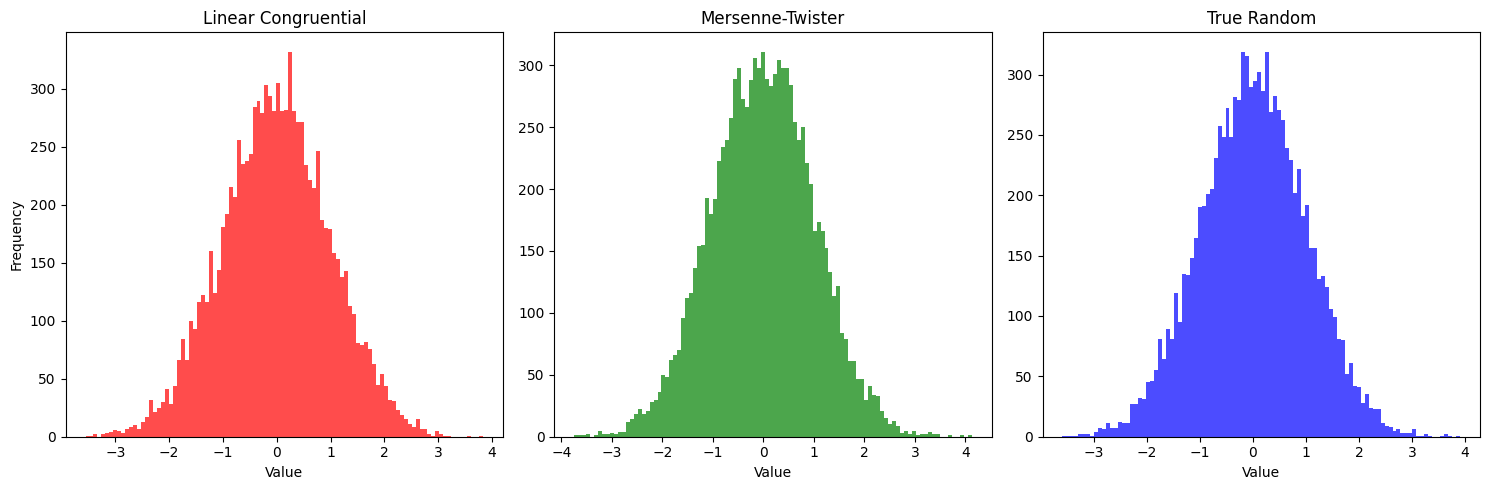

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/hist_gauss.png")

## Student's t-Test

In [7]:
ttest1 = stats.ttest_ind(linear_congruential, true_random)
print(f"Linear Congruential vs True Random: t = {ttest1.statistic[0]:.3f}, p = {ttest1.pvalue[0]:.3f}")

ttest2 = stats.ttest_ind(mersenne_twister, true_random)
print(f"Mersenne-Twister vs True Random: t = {ttest2.statistic[0]:.3f}, p = {ttest2.pvalue[0]:.3f}")

ttest3 = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest3.statistic[0]:.3f}, p = {ttest3.pvalue[0]:.3f}")

Linear Congruential vs True Random: t = -1.366, p = 0.172
Mersenne-Twister vs True Random: t = -1.176, p = 0.240
Linear Congruential vs Mersenne-Twister: t = -0.184, p = 0.854
